# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Taller


4. Entrenar una red de base radial para sintetizar la función de la tabla.

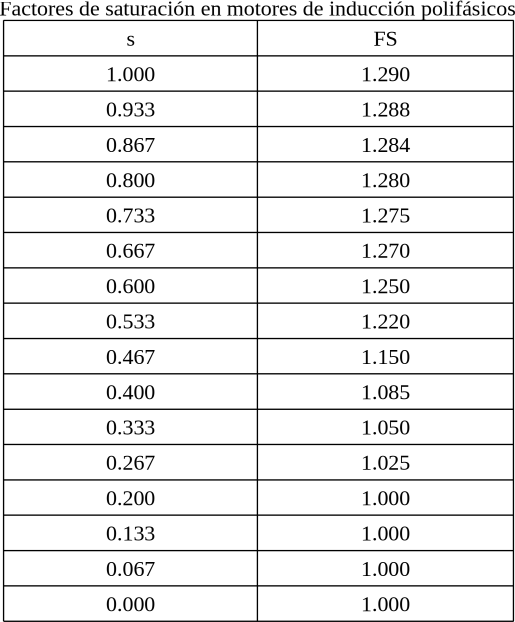

In [ ]:
from IPython.display import SVG
SVG('img2/din_fig3.svg')

  

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

def intializeWeights(clusters):
    return np.random.uniform(-1, 1, (clusters, 1))

def gaussian(param, x):
    mean = param[:,0]
    sd = param[:,1]
    return np.exp((-1*(x-mean)**2)/(2*sd**2)).reshape(param.shape[0],1)

def euc_dist(x1, x2):
    return np.abs(x1-x2)

def same_width(centers,clusters):
    sd = (np.amax(centers)-np.amin(centers))/np.sqrt(2*clusters)
    sd = np.repeat(sd,clusters).reshape(clusters,1)
    return sd

def diff_width(centers,X,predicted_clusters,clusters):
    sd = np.sqrt(np.array([np.mean((centers[i,] - X[predicted_clusters == i]) ** 2, axis=0) for i in range(clusters)]))
    for i in range(sd.shape[0]):
        if sd[i, 0] == 0.0:
            sd[i, 0] = np.mean(sd[np.arange(len(sd)) != i])
    return sd

def kmeans(X, clusters, isSameWidth):
    centers = np.random.choice(np.squeeze(X), clusters, False).reshape(clusters,1)

    while True:
        dist_from_centers = np.squeeze(np.array([euc_dist(X, centers[i,]) for i in range(clusters)])).T
        predicted_clusters = np.argmin(dist_from_centers, axis=1)
        centers_new =  np.array([np.mean(X[predicted_clusters == i], axis=0) for i in range(clusters)])
        if np.array_equal(centers_new, centers):
           break
        centers = centers_new

    if not isSameWidth:
        sd = diff_width(centers,X,predicted_clusters,clusters)
    else:
        sd = same_width(centers,clusters)

    return np.squeeze(np.dstack((centers, sd)))

def lms(W, g, d, y, eta, b):
    return W+eta*g*(d-y), b+eta*(d-y)

def getOutput(gaussian_params, x, W, b):
    return np.squeeze(np.dot((gaussian(gaussian_params, x)).T, W))+b

def rbs(X, D, eta, bases, isSameWidth):
    W = intializeWeights(bases)
    b = np.random.uniform(-1, 1)
    params = kmeans(X, bases, isSameWidth)

    for i in range(100):
        Y = []
        for j in range(X.shape[0]):
            y = getOutput(params,X[j, 0],W,b)
            W, b = lms(W, gaussian(params, X[j, 0]), D[j, 0], y, eta, b)
            Y.append(np.squeeze(y))
    return np.array(Y),W,b,params

def plotGraph(gaussian_params,X, D, bias, eta, bases, isSameWidth):
    if not os.path.exists('graphs/'):
        os.makedirs('graphs/')

    X1 = np.linspace(0, 1, 150)
    Y1 = np.array([getOutput(gaussian_params,x,W,bias) for x in X1])
    width = "Diferentes"
    if isSameWidth:
        width = "Iguales"

    plt.scatter(X, D, label="Salida deseada")
    plt.plot(X1,Y1, label="Red de base radial", color="#52D017")
    #plt.plot(X1,h(X1), label="Funcion original", color="#4B0082")
    plt.title("Aprendizaje = {}, Bases = {}, Ancho Gaussiano = {}".format(eta,bases,width))
    plt.legend()
    plt.savefig('graphs/' + str(eta) + "_" + str(bases) + "_" + str(width) + '.jpg')
    plt.clf()


if __name__ == "__main__":
    X=[[1.000],[0.933],[0.867],[0.800],[0.733],[0.667],[0.600],[0.533],[0.467],[0.400],[0.333],[0.267],[0.200],[0.133],[0.067],[0.000]]
    X=np.array(X)

    Y=[[1.290],[1.288],[1.284],[1.280],[1.275],[1.270],[1.250],[1.220],[1.150],[1.085],[1.050],[1.025],[1.000],[1.00],[1.000],[1.000]]
    Y=np.array(Y)
    #D=noise(Y)
    bases = [2,4,6,8,10,12,14]
    eta = [0.01,0.02]
    gaussian_width=[False,True]

    for b in bases:
        for e in eta:
            for isSameWidth in gaussian_width:
                Y1,W,bias,g = rbs(X,Y,e,b,isSameWidth)
                plotGraph(g,X,Y,bias,e,b,isSameWidth)



<Figure size 432x288 with 0 Axes>